In [1]:
#常用資料處理模組
import csv
import numpy as np
#可視化模組
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import array
import pandas as pd 
from pandas.core.frame import DataFrame
from keras.models import Model
from keras.layers import Dense, Input, Activation, Dropout
from keras.models import Sequential


In [2]:
#讀取資料
dataset1 = pd.read_csv("C:\\Users\\Yi-Chen\\python\\Link prediction\\hw2_data\\dataset2\\train.csv")
dataset1 = pd.DataFrame(dataset1)
content = pd.read_csv("C:\\Users\\Yi-Chen\\python\\Link prediction\\hw2_data\\dataset2\\content.csv", delimiter='\t', header= None)

In [3]:
dataset1

,id,to,from,label
0,E5138,1747,3160,1
1,E2648,737,2843,0
2,E7373,55,1883,0
3,E4502,2879,2138,1
4,E4167,671,432,0
...,...,...,...,...
7539,E3808,821,1668,0
7540,E4405,865,2007,0
7541,E9426,2958,2884,1
7542,E2512,2818,2024,1


In [4]:
content

,0,1,2,3,4,5,6,7,8,9,...,3694,3695,3696,3697,3698,3699,3700,3701,3702,3703
0,2316,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1106,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1861,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2745,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,665,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3308,535,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3309,3064,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3310,2080,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
 content[0]

0       2316
1       1106
2       1861
3       2745
4        457
        ... 
3307     665
3308     535
3309    3064
3310    2080
3311     416
Name: 0, Length: 3312, dtype: int64

In [6]:
#先處理content資料集，將content每bit分割，把每個bit變一個特徵
#因為content的Node編號是隨機，所以重新排列

In [7]:
#第一個bit欄位名稱設為id
content.rename(columns={ content.columns[0]: "id" }, inplace=True)
content

,id,1,2,3,4,5,6,7,8,9,...,3694,3695,3696,3697,3698,3699,3700,3701,3702,3703
0,2316,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1106,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1861,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2745,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,665,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3308,535,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3309,3064,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3310,2080,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
contentArray = content.values
contentArray

array([[2316,    0,    0, ...,    0,    0,    0],
       [1106,    0,    0, ...,    0,    0,    0],
       [1861,    0,    1, ...,    0,    0,    0],
       ...,
       [3064,    0,    0, ...,    0,    0,    0],
       [2080,    0,    0, ...,    0,    0,    0],
       [ 416,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [9]:
#重新排列
contentArray_sort = contentArray[contentArray[:,0].argsort()]
contentArray_sort = pd.DataFrame(contentArray_sort)
contentArray_sort
#content有3312個nodes

,0,1,2,3,4,5,6,7,8,9,...,3694,3695,3696,3697,3698,3699,3700,3701,3702,3703
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,3307,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3308,3308,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3309,3309,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3310,3310,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
contentArray_sort[3][1747]

1

In [11]:
#創建相鄰矩陣adjacency matrix，根據node數量建立matrix大小
def load_data1(dataset1):
    matrix =np.zeros( (3312, 3312) )
    #對應train資料有連接上則給予1，無則0
    a=0
    b=0
    for index,row in dataset1.iterrows():
        if row[3]==1:
            x = row[1]
            y = row[2]
            matrix[x,y] = 1
            matrix[y,x] = 1 #因為是NO DIRECTION!
            a=a+1
        else:
            x = row[1]
            y = row[2]
            matrix[x,y] = 0
            matrix[y,x] = 0
            b=b+1
    print(a,b,a+b)
    return matrix


In [12]:
matrix = load_data1(dataset1)
matrix = pd.DataFrame(matrix)
matrix #matrix代表和其他nodes相連狀況

3736 3808 7544


,0,1,2,3,4,5,6,7,8,9,...,3302,3303,3304,3305,3306,3307,3308,3309,3310,3311
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
matrix[1747][3160]

1.0

In [14]:
matrix[3160][1747]

1.0

In [15]:
#再將content & adjacency matrix 合併成為最後想測試的資料特徵=>把每個人的特徵和label的標籤做合併
contentfinal = pd.concat([contentArray_sort,matrix],axis=1)
contentfinal = contentfinal.values
contentfinal = pd.DataFrame(contentfinal)
contentfinal

,0,1,2,3,4,5,6,7,8,9,...,7006,7007,7008,7009,7010,7011,7012,7013,7014,7015
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,3307.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3308,3308.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3309,3309.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3310,3310.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#將對應特徵匯入train data裡面
#造to矩陣
def load_data_to(dataset1):
    data = []
    for index, row in dataset1.iterrows():
        x = row[1]
        data.append(contentfinal.iloc[x,1:])
    return data

df_to = load_data_to(dataset1)
df_to = pd.DataFrame(df_to)
df_to = df_to.values
df_to = pd.DataFrame(df_to)

#造from矩陣
def load_data_from(dataset1):
    data = []
    for index, row in dataset1.iterrows():
        x = row[2]
        data.append(contentfinal.iloc[x,1:])
    return data

df_from = load_data_from(dataset1)
df_from = pd.DataFrame(df_from)
df_from = df_from.values
df_from = pd.DataFrame(df_from)

#將兩矩陣合併成測試資料
df = pd.concat([df_to,df_from],axis=1)
df = df.values
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,14020,14021,14022,14023,14024,14025,14026,14027,14028,14029
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#定義特徵欄位以及label欄位
data = df.iloc[:,:].values
data = pd.DataFrame(data)
data1=df
print('特徵欄位')
print(data)
print(df)
label = dataset1.loc[:,'label'].values
label = pd.DataFrame(label)
print('label')
label

特徵欄位
      0      1      2      3      4      5      6      7      8      9      \
0       0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
7539    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7540    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7541    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7542    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7543    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  14020  14021  14022  14023  14024  14025  14026

,0
0,1
1,0
2,0
3,1
4,0
...,...
7539,0
7540,0
7541,1
7542,1


In [18]:
x_train=data

In [19]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,14020,14021,14022,14023,14024,14025,14026,14027,14028,14029
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#建立autoencoder
encoding_dim = 10
# this is our input placeholder
input_img = Input(shape=(14030,))
# encoder layers
# encoded = Dense(1024, activation='relu')(input_img)
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(20, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)
# decoder layers
decoded = Dense(20, activation='relu')(encoder_output)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
# decoded = Dense(1024, activation='relu')(decoded)
decoder_output = Dense(14030)(decoded)
# decoded = Dense(20654, activation='tanh')(decoded)
# construct the autoencoder model
autoencoder = Model(inputs=input_img, outputs=decoder_output)
# construct the encoder model for plotting
# encoder = Model(inputs=input_img, outputs=encoder_output)

autoencoder.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14030)]           0         
                                                                 
 dense (Dense)               (None, 512)               7183872   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 20)                2580      
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 128)               2688  

In [21]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
# training
hidtory=autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                shuffle=True)

Epoch 1/15
30/30 [==============================] - 11s 172ms/step - loss: 0.0051
Epoch 2/15
30/30 [==============================] - 5s 171ms/step - loss: 0.0049
Epoch 3/15
30/30 [==============================] - 6s 189ms/step - loss: 0.0049
Epoch 4/15
30/30 [==============================] - 6s 210ms/step - loss: 0.0048
Epoch 5/15
30/30 [==============================] - 6s 209ms/step - loss: 0.0048
Epoch 6/15
30/30 [==============================] - 6s 186ms/step - loss: 0.0048
Epoch 7/15
30/30 [==============================] - 5s 168ms/step - loss: 0.0047
Epoch 8/15
30/30 [==============================] - 5s 171ms/step - loss: 0.0047
Epoch 9/15
30/30 [==============================] - 5s 176ms/step - loss: 0.0046
Epoch 10/15
30/30 [==============================] - 5s 166ms/step - loss: 0.0046
Epoch 11/15
30/30 [==============================] - 5s 167ms/step - loss: 0.0046
Epoch 12/15
30/30 [==============================] - 5s 173ms/step - loss: 0.0045
Epoch 13/15
30/30 [=====

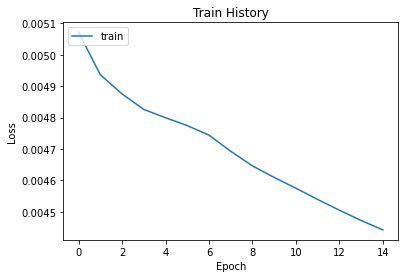

In [22]:
def show_train_history_autoencoder(train_acc):
    plt.plot(hidtory.history[train_acc])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
show_train_history_autoencoder('loss')

In [24]:
auto_x_train=data

In [25]:
auto_x_train

,0,1,2,3,4,5,6,7,8,9,...,14020,14021,14022,14023,14024,14025,14026,14027,14028,14029
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#訓練普通的NN分類模型
classifier = Sequential()
#First Hidden Layer-> 輸出1024維
# classifier.add(Dense(1024, activation='relu', kernel_initializer='random_normal', input_dim=20654))
#Second  Hidden Layer
# classifier.add(Dense(512, activation='relu', kernel_initializer='random_normal'))
#Third  Hidden Layer
classifier.add(Dense(256, activation='relu', kernel_initializer='random_normal', input_dim=14030))
classifier.add(Dropout(0.3))
#Forth  Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Fifth  Hidden Layer
classifier.add(Dense(20, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
print(classifier.summary()) #顯示架構
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
train_history=classifier.fit(auto_x_train,label, batch_size=256, epochs=15)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               3591936   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 20)                1300      
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 2

In [27]:
#調整nn的epoch
#訓練普通的NN分類模型
classifier = Sequential()
#First Hidden Layer-> 輸出1024維
# classifier.add(Dense(1024, activation='relu', kernel_initializer='random_normal', input_dim=20654))
#Second  Hidden Layer
# classifier.add(Dense(512, activation='relu', kernel_initializer='random_normal'))
#Third  Hidden Layer
# classifier.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
#Forth  Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=14030))
classifier.add(Dropout(0.3))
#Fifth  Hidden Layer
classifier.add(Dense(20, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.summary()  #顯示架構
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
train_history=classifier.fit(auto_x_train,label, batch_size=256, epochs=25)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                897984    
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 20)                1300      
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 21        
                                                                 
Total params: 899,305
Trainable params: 899,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
30/30 [==============================

In [28]:
#呈現accuracy
import matplotlib.pyplot as plt
def show_train_history(train_acc):
    plt.plot(train_history.history[train_acc])
#     plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

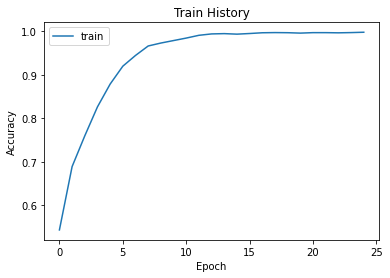

In [29]:
show_train_history('accuracy')

In [30]:
#呈現loss
def show_train_history(train_acc):
    plt.plot(train_history.history[train_acc])
#     plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

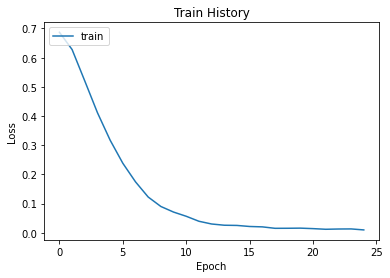

In [31]:
show_train_history('loss')

In [32]:
#匯入test data做最後測試
#test資料前處裡
test1 = pd.read_csv("C:\\Users\\Yi-Chen\\python\\Link prediction\\hw2_data\\dataset2\\test.csv")
test1.id = test1.id.str.replace('E',"")
test1


,id,to,from
0,3064,1315,586
1,298,143,1242
2,3512,507,482
3,5670,1063,1101
4,5005,1067,1710
...,...,...,...
1881,9179,1838,97
1882,5003,1272,1272
1883,5081,201,560
1884,4705,2316,136


In [33]:
dd_to = load_data_to(test1)
dd_to = pd.DataFrame(dd_to)
dd_to = dd_to.values
dd_to = pd.DataFrame(dd_to)
# print('=============================')
# print(dd_to)
dd_from = load_data_from(test1)
dd_from = pd.DataFrame(dd_from)
dd_from = dd_from.values
dd_from = pd.DataFrame(dd_from)
dd = pd.concat([dd_to,dd_from],axis=1)
dd = dd.values
dd = pd.DataFrame(dd)
# dd_test = pd.concat([dd,test1],axis=1)
# print('=============================')
# print(dd_test)

In [43]:
#放入autoencoder
# prob = encoder.predict(dd)
auto_dd = autoencoder.predict(dd)
auto_dd = pd.DataFrame(auto_dd)
y_pred=classifier.predict(auto_dd)
y_pred =(y_pred>0.5)
y_pred
data_test_label = classifier.predict(auto_dd)
data_test_label = pd.DataFrame(data_test_label)
data_test_label.columns=["prob"]
test1 = pd.read_csv("C:\\Users\\Yi-Chen\\python\\Link prediction\\hw2_data\\dataset2\\test.csv")
result=pd.concat([test1,data_test_label],axis=1)
#存取測試資料
result.to_csv('C:\\Users\\Yi-Chen\\python\\Link prediction\\hw2_data\\dataset2\\result11_set2.csv')

59/59 [==============================] - 3s 2ms/step


In [ ]:
#autoencoder epoch=25表現>epoch=15
#nn增加層數並不會增加表現